In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import f_oneway
import statsmodels.api as sm

**Đọc file final_data**

In [22]:
df = pd.read_csv('../data/processed/final_data.csv')

Xem thông tin

In [23]:
df.shape

(66139, 18)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66139 entries, 0 to 66138
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mssv            66139 non-null  object 
 1   hocky           66139 non-null  float64
 2   namhoc          66139 non-null  float64
 3   dtbhk           66139 non-null  float64
 4   sotchk          66139 non-null  float64
 5   id              55857 non-null  float64
 6    namsinh        55857 non-null  float64
 7    gioitinh       55857 non-null  float64
 8    noisinh        55857 non-null  object 
 9    lopsh          55857 non-null  object 
 10   khoa           55857 non-null  object 
 11   hedt           55857 non-null  object 
 12   khoahoc        55857 non-null  float64
 13   chuyennganh2   55857 non-null  object 
 14   tinhtrang      55857 non-null  float64
 15   diachi_tinhtp  55857 non-null  object 
 16  Column1         10461 non-null  object 
 17  dtbhk2          66139 non-null 

Thống kê

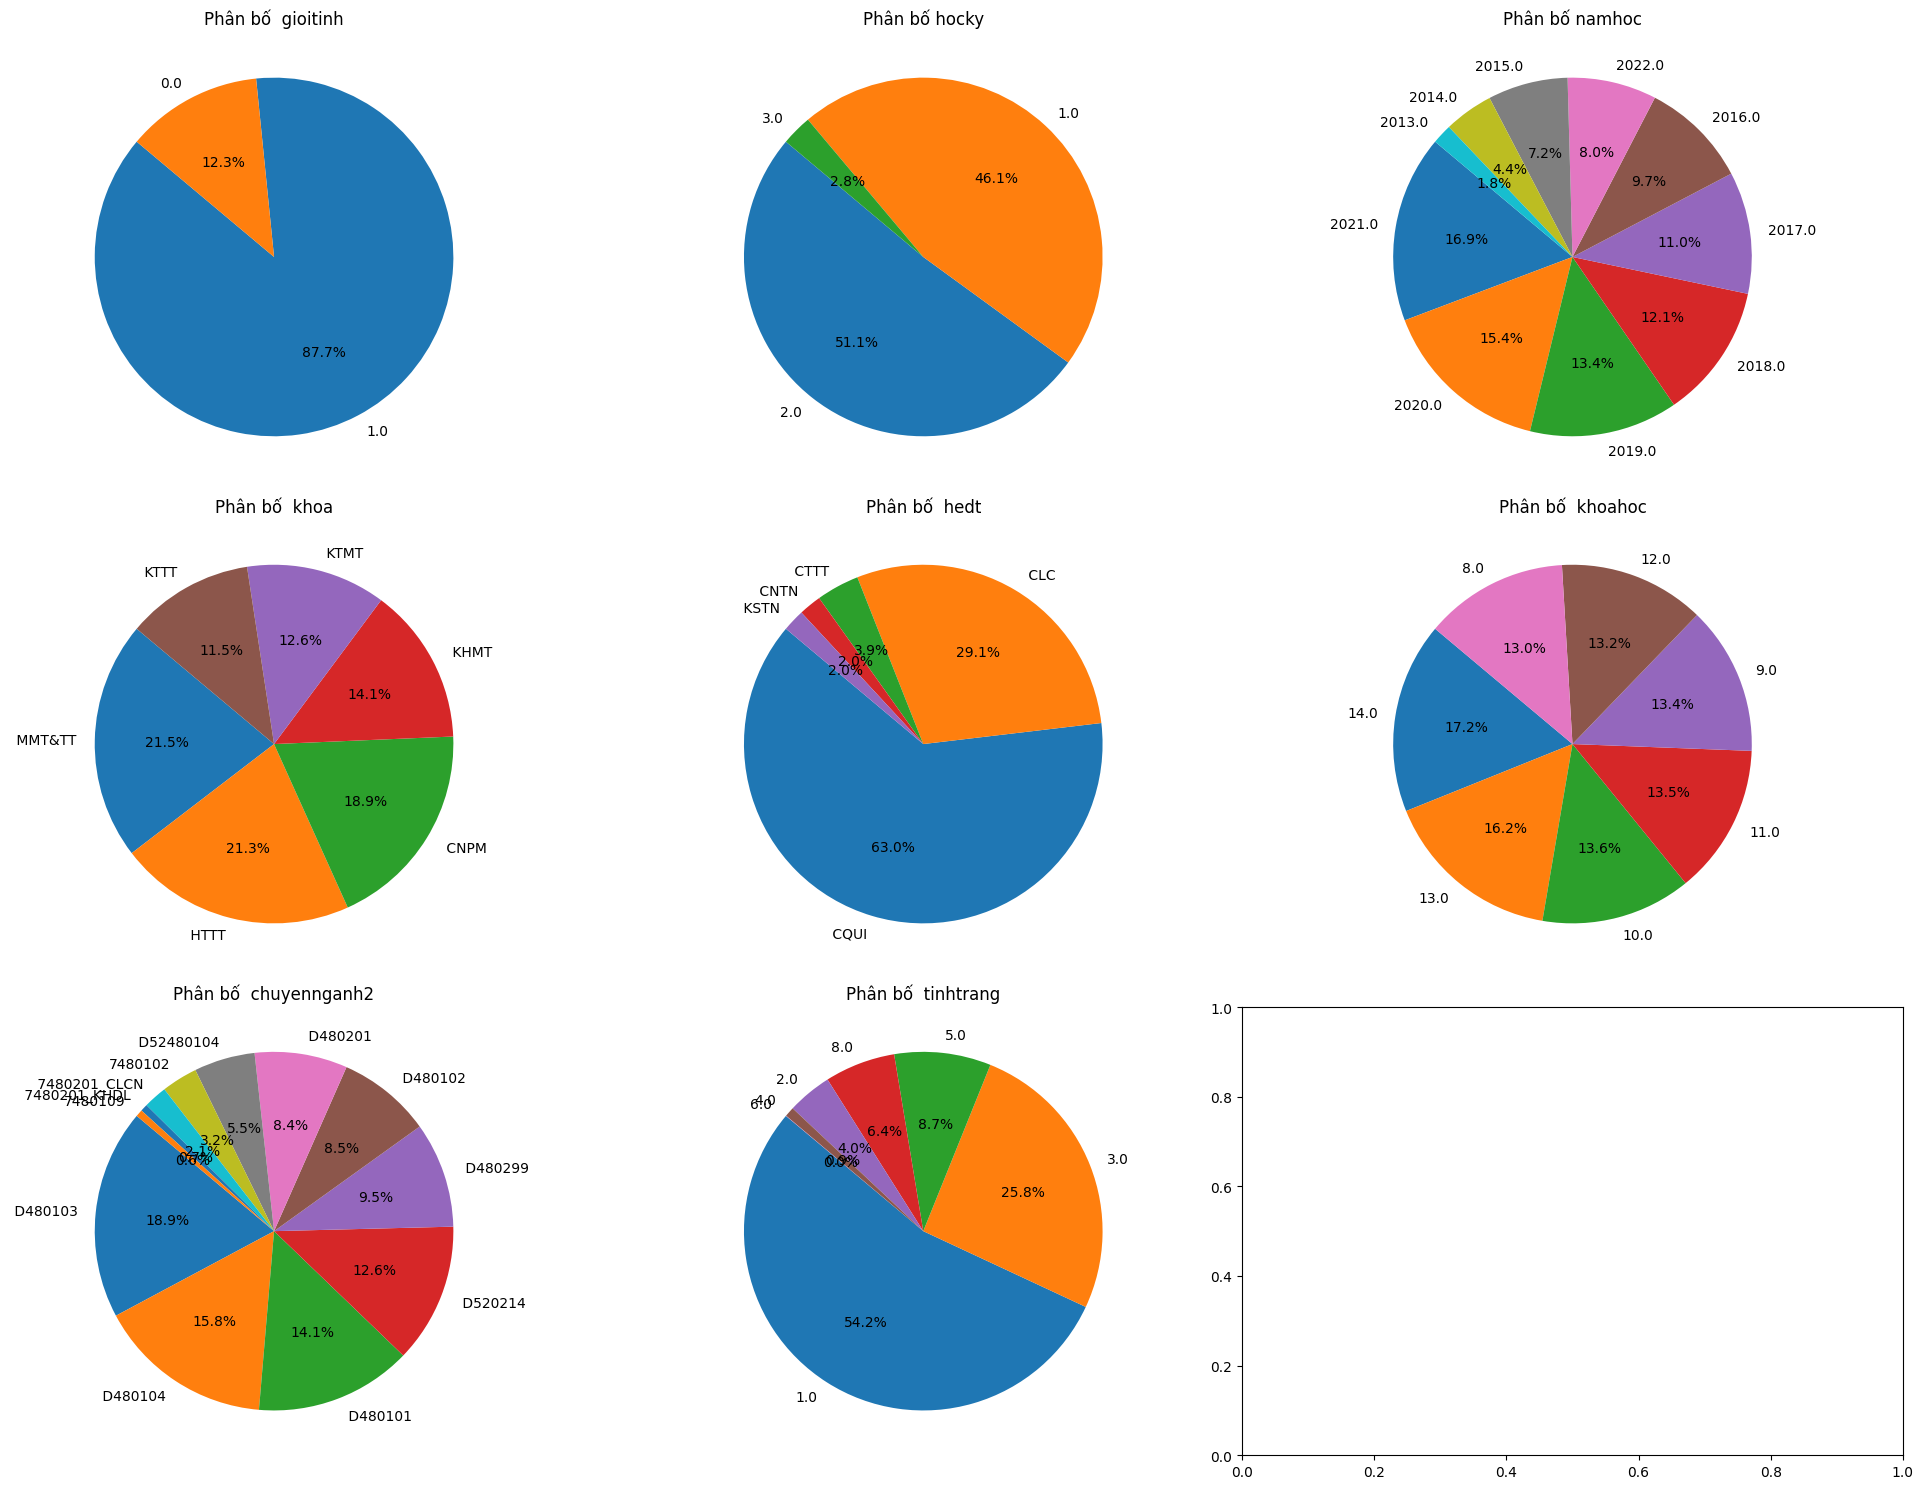

In [25]:

# Tạo các giá trị đếm cho từng cột
columns = [' gioitinh', 'hocky', 'namhoc', ' khoa', ' hedt', ' khoahoc', ' chuyennganh2', ' tinhtrang']
counts = {col: df[col].value_counts() for col in columns}

# Tạo các subplot cho nhiều biểu đồ tròn
fig, axes = plt.subplots(3, 3, figsize=(20, 15))  # 3 hàng, 3 cột

# Vẽ biểu đồ tròn cho từng cột
for i, col in enumerate(columns):
    ax = axes[i//3, i%3]  # Chọn vị trí subplot
    ax.pie(counts[col], labels=counts[col].index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Phân bố {col}')

# Điều chỉnh layout để không bị chồng chéo
plt.tight_layout()
plt.show()

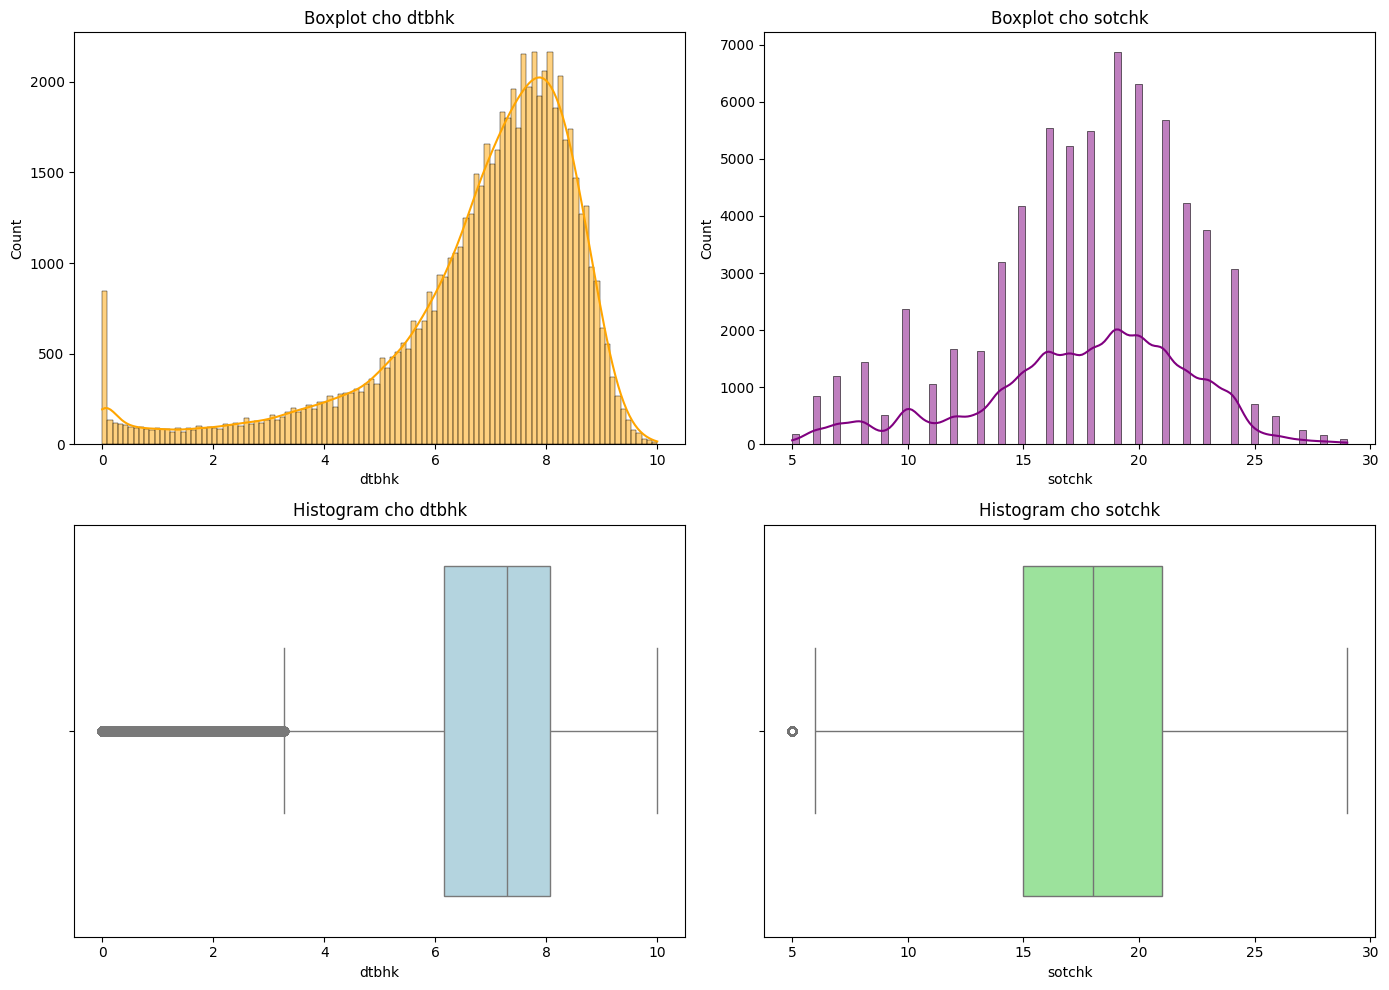

In [26]:
# Tạo một figure với 2 hàng và 2 cột (2 biểu đồ Boxplot và 2 biểu đồ Histogram)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Tạo Histogram cho cột 'dtbhk'
sns.histplot(df['dtbhk'], ax=axes[0, 0], kde=True, color='orange')
axes[1, 0].set_title('Histogram cho dtbhk')

# Tạo Histogram cho cột 'sotchk'
sns.histplot(df['sotchk'], ax=axes[0, 1], kde=True, color='purple')
axes[1, 1].set_title('Histogram cho sotchk')

# Tạo Boxplot cho cột 'dtbhk'
sns.boxplot(ax=axes[1, 0], data=df, x='dtbhk', color='lightblue')
axes[0, 0].set_title('Boxplot cho dtbhk')

# Tạo Boxplot cho cột 'sotchk'
sns.boxplot(ax=axes[1, 1], data=df, x='sotchk', color='lightgreen')
axes[0, 1].set_title('Boxplot cho sotchk')


# Điều chỉnh layout để không bị chồng chéo
plt.tight_layout()
plt.show()

In [27]:
unique_count = df['sotchk'].nunique()

print("Số tin chi hoc ky:", unique_count)

# Đếm số lần xuất hiện của mỗi giá trị trong cột "mssv"
value_counts = df['sotchk'].value_counts()

print("Số lần xuất hiện của từng giá trị:")
print(value_counts)


Số tin chi hoc ky: 25
Số lần xuất hiện của từng giá trị:
sotchk
19.0    6874
20.0    6317
21.0    5688
16.0    5537
18.0    5490
17.0    5222
22.0    4221
15.0    4175
23.0    3752
14.0    3199
24.0    3070
10.0    2375
12.0    1673
13.0    1626
8.0     1435
7.0     1204
11.0    1050
6.0      844
25.0     704
9.0      511
26.0     487
27.0     244
5.0      179
28.0     168
29.0      94
Name: count, dtype: int64


In [28]:
# Khởi tạo OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Các cột cần mã hóa
ordinal_features = [' lopsh', ' khoa', ' hedt', ' chuyennganh2']

# Mã hóa các cột bằng OrdinalEncoder
for feature in ordinal_features:
    if feature in df.columns:  # Kiểm tra nếu cột tồn tại trong DataFrame
        df[feature + '_mahoa'] = ordinal_encoder.fit_transform(df[[feature]])[:, 0]

# Kiểm tra kết quả mã hóa
print(df[ordinal_features + [' lopsh_mahoa', ' khoa_mahoa', ' hedt_mahoa', ' chuyennganh2_mahoa']].head())

       lopsh   khoa   hedt  chuyennganh2   lopsh_mahoa   khoa_mahoa  \
0        NaN    NaN    NaN           NaN           NaN          NaN   
1        NaN    NaN    NaN           NaN           NaN          NaN   
2   TMĐT2019   HTTT   CQUI     D52480104         155.0          1.0   
3   TMĐT2019   HTTT   CQUI     D52480104         155.0          1.0   
4   TMĐT2019   HTTT   CQUI     D52480104         155.0          1.0   

    hedt_mahoa   chuyennganh2_mahoa  
0          NaN                  NaN  
1          NaN                  NaN  
2          2.0                  9.0  
3          2.0                  9.0  
4          2.0                  9.0  


In [ ]:
df = df.drop(columns=['id'])

# Kiểm tra lại DataFrame sau khi bỏ cột
print(df.head())

                                       mssv  hocky  namhoc  dtbhk  sotchk  \
0  0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6    2.0  2021.0   8.28    21.0   
1  0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6    1.0  2022.0   7.56    16.0   
2  0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G    2.0  2019.0   9.00    21.0   
3  0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G    1.0  2020.0   9.11    15.0   
4  0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G    2.0  2020.0   8.75    19.0   

    namsinh   gioitinh     noisinh      lopsh   khoa  ...  khoahoc  \
0       NaN        NaN         NaN        NaN    NaN  ...      NaN   
1       NaN        NaN         NaN        NaN    NaN  ...      NaN   
2    2001.0        0.0   'Nghệ An'   TMĐT2019   HTTT  ...     14.0   
3    2001.0        0.0   'Nghệ An'   TMĐT2019   HTTT  ...     14.0   
4    2001.0        0.0   'Nghệ An'   TMĐT2019   HTTT  ...     14.0   

    chuyennganh2  tinhtrang    diachi_tinhtp Column1 dtbhk2   lopsh_mahoa  \
0            NaN        NaN            

In [30]:
# Xử lý NaN trước khi tính toán độ tương quan
df_cleaned = df_cleaned = df.dropna()
print(df_cleaned.head())

                                        mssv  hocky  namhoc  dtbhk  sotchk  \
32  0018C59CXPvAibaEXe8C3lblh2dNniH+SYgLosUA    2.0  2019.0   8.04    23.0   
33  0018C59CXPvAibaEXe8C3lblh2dNniH+SYgLosUA    1.0  2020.0   6.91    18.0   
34  0018C59CXPvAibaEXe8C3lblh2dNniH+SYgLosUA    2.0  2020.0   8.49    22.0   
35  0018C59CXPvAibaEXe8C3lblh2dNniH+SYgLosUA    1.0  2021.0   8.85    23.0   
36  0018C59CXPvAibaEXe8C3lblh2dNniH+SYgLosUA    2.0  2021.0   7.40    22.0   

     namsinh   gioitinh    noisinh        lopsh   khoa  ...  khoahoc  \
32    2000.0        1.0   'Cà Mau'   KHCL2019.1   KHMT  ...     14.0   
33    2000.0        1.0   'Cà Mau'   KHCL2019.1   KHMT  ...     14.0   
34    2000.0        1.0   'Cà Mau'   KHCL2019.1   KHMT  ...     14.0   
35    2000.0        1.0   'Cà Mau'   KHCL2019.1   KHMT  ...     14.0   
36    2000.0        1.0   'Cà Mau'   KHCL2019.1   KHMT  ...     14.0   

     chuyennganh2  tinhtrang   diachi_tinhtp        Column1 dtbhk2  \
32        D480101        1.0

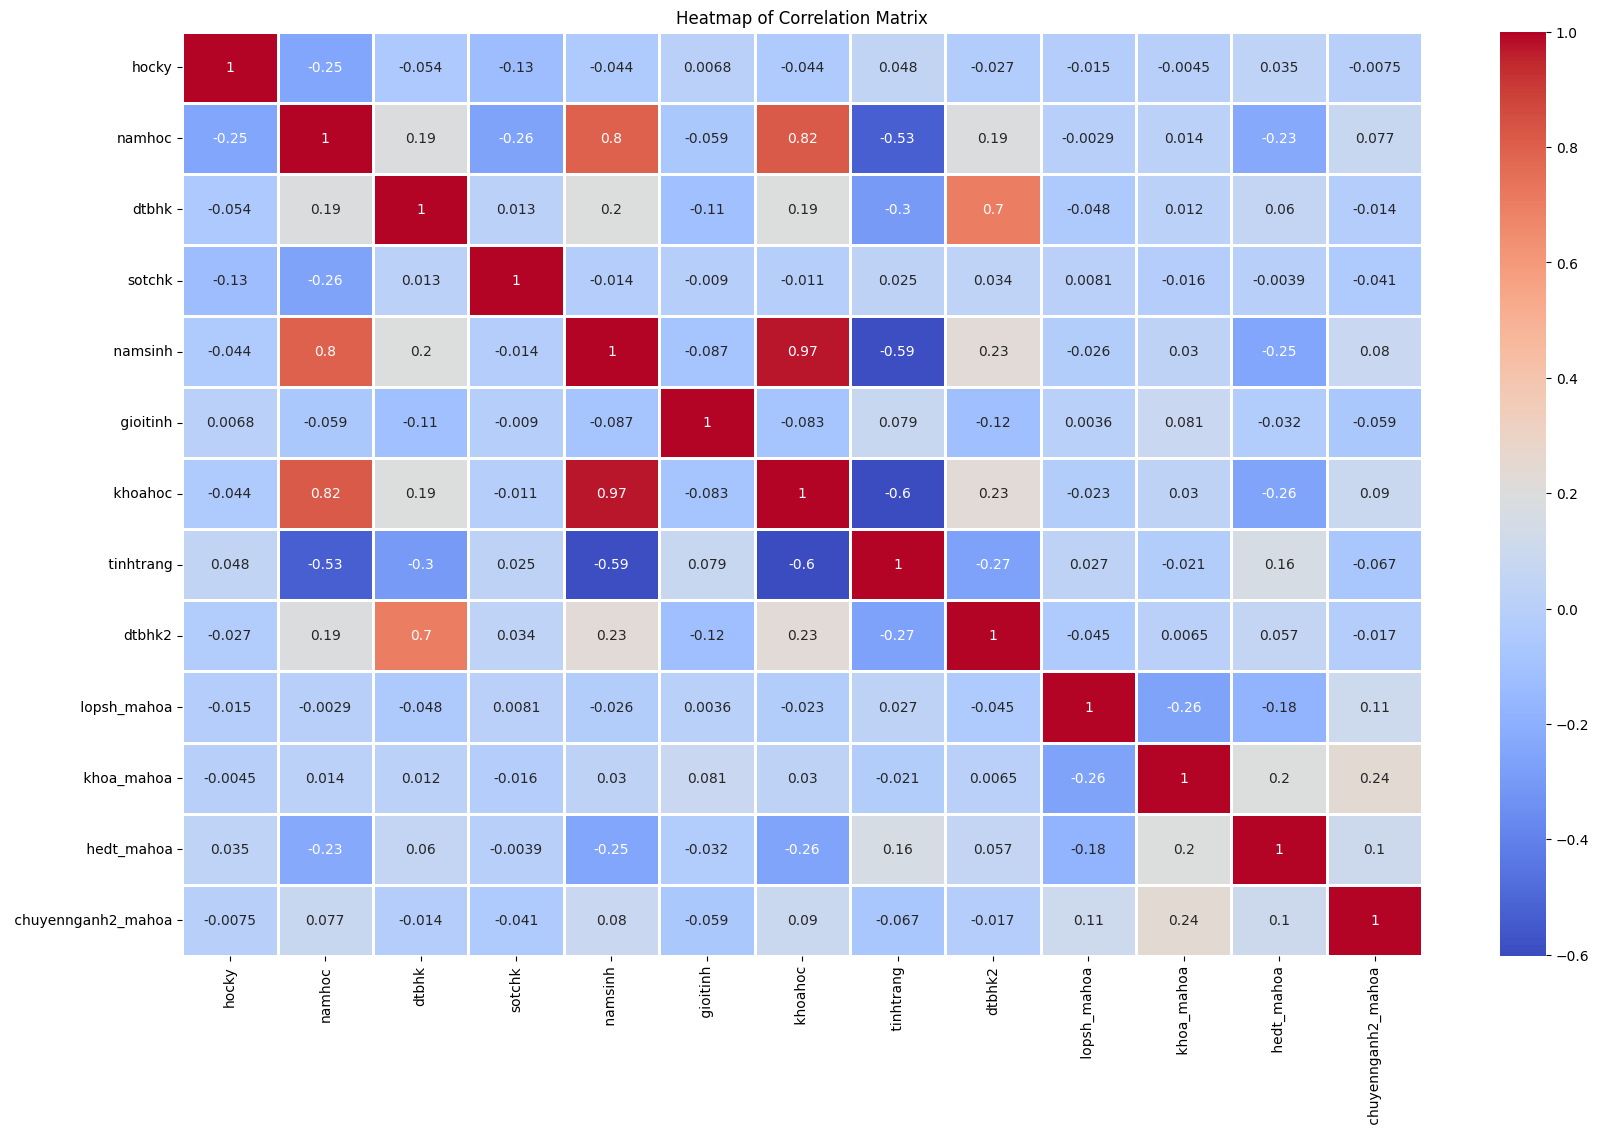

In [31]:
# Tính toán ma trận tương quan chỉ với các cột số
numeric_df = df_cleaned.select_dtypes(include=['number'])
corr = numeric_df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

**Kiểm định Anova**

In [32]:
# Tạo danh sách các nhóm 'dtbhk' theo các giá trị của 'khoa'
groups = [group["dtbhk"].values for name, group in df.groupby(" lopsh_mahoa")]

# Thực hiện ANOVA
anova_result = f_oneway(*groups)

print("Kết quả ANOVA:")
print("F-value:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

# Kiểm tra ý nghĩa thống kê
if anova_result.pvalue < 0.05:
    print("Có sự khác biệt có ý nghĩa thống kê giữa các nhóm của 'lopsh'.")
else:
    print("Không có sự khác biệt có ý nghĩa thống kê giữa các nhóm của 'lopsh'.")

Kết quả ANOVA:
F-value: 42.67398137772393
P-value: 0.0
Có sự khác biệt có ý nghĩa thống kê giữa các nhóm của 'lopsh'.


In [33]:
# Tạo danh sách các nhóm 'dtbhk' theo các giá trị của 'khoa'
groups = [group["dtbhk"].values for name, group in df.groupby(" khoa_mahoa")]

# Thực hiện ANOVA
anova_result = f_oneway(*groups)

print("Kết quả ANOVA:")
print("F-value:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

# Kiểm tra ý nghĩa thống kê
if anova_result.pvalue < 0.05:
    print("Có sự khác biệt có ý nghĩa thống kê giữa các nhóm của 'khoa'.")
else:
    print("Không có sự khác biệt có ý nghĩa thống kê giữa các nhóm của 'khoa'.")

Kết quả ANOVA:
F-value: 64.39839005940645
P-value: 2.9378240561982745e-67
Có sự khác biệt có ý nghĩa thống kê giữa các nhóm của 'khoa'.


In [34]:
# Tạo danh sách các nhóm 'dtbhk' theo các giá trị của 'hedt'
groups = [group["dtbhk"].values for name, group in df.groupby(" hedt_mahoa")]

# Thực hiện ANOVA
anova_result = f_oneway(*groups)

print("Kết quả ANOVA:")
print("F-value:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

# Kiểm tra ý nghĩa thống kê
if anova_result.pvalue < 0.05:
    print("Có sự khác biệt có ý nghĩa thống kê giữa các nhóm của 'hedt'.")
else:
    print("Không có sự khác biệt có ý nghĩa thống kê giữa các nhóm của 'hedt'.")

Kết quả ANOVA:
F-value: 410.7968176986214
P-value: 0.0
Có sự khác biệt có ý nghĩa thống kê giữa các nhóm của 'hedt'.


In [35]:
# Tạo danh sách các nhóm 'dtbhk' theo các giá trị của 'chuyennganh2'
groups = [group["dtbhk"].values for name, group in df.groupby(" chuyennganh2_mahoa")]

# Thực hiện ANOVA
anova_result = f_oneway(*groups)

print("Kết quả ANOVA:")
print("F-value:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

# Kiểm tra ý nghĩa thống kê
if anova_result.pvalue < 0.05:
    print("Có sự khác biệt có ý nghĩa thống kê giữa các nhóm của 'chuyennganh2'.")
else:
    print("Không có sự khác biệt có ý nghĩa thống kê giữa các nhóm của 'chuyennganh2'.")

Kết quả ANOVA:
F-value: 63.6093242120937
P-value: 5.1948258886182e-142
Có sự khác biệt có ý nghĩa thống kê giữa các nhóm của 'chuyennganh2'.


In [36]:
# Tạo danh sách các nhóm 'dtbhk' theo các giá trị của 'tinhtrang'
groups = [group["dtbhk"].values for name, group in df.groupby(" tinhtrang")]

# Thực hiện ANOVA
anova_result = f_oneway(*groups)

print("Kết quả ANOVA:")
print("F-value:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

# Kiểm tra ý nghĩa thống kê
if anova_result.pvalue < 0.05:
    print("Có sự khác biệt có ý nghĩa thống kê giữa các nhóm của 'tinhtrang'.")
else:
    print("Không có sự khác biệt có ý nghĩa thống kê giữa các nhóm của 'tinhtrang'.")

Kết quả ANOVA:
F-value: 5121.076518280238
P-value: 0.0
Có sự khác biệt có ý nghĩa thống kê giữa các nhóm của 'tinhtrang'.


In [37]:
# Tạo danh sách các nhóm 'dtbhk' theo các giá trị của 'khoa'
groups = [group["dtbhk"].values for name, group in df.groupby("dtbhk2")]

# Thực hiện ANOVA
anova_result = f_oneway(*groups)

print("Kết quả ANOVA:")
print("F-value:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

# Kiểm tra ý nghĩa thống kê
if anova_result.pvalue < 0.05:
    print("Có sự khác biệt có ý nghĩa thống kê giữa các nhóm của 'dtbhk2'.")
else:
    print("Không có sự khác biệt có ý nghĩa thống kê giữa các nhóm của 'dtbhk2'.")

Kết quả ANOVA:
F-value: 72.1595308589772
P-value: 0.0
Có sự khác biệt có ý nghĩa thống kê giữa các nhóm của 'dtbhk2'.


**PHÂN TÍCH HỒI QUY (HỒI QUY TUYẾN TÍNH)**

In [38]:
# Thiết lập biến độc lập (X) và biến phụ thuộc (y)
X = df_cleaned[['sotchk'] + [col for col in df_cleaned.columns if ' khoa_mahoa' in col or ' hedt_mahoa' in col or ' chuyennganh2_mahoa' in col or ' lopsh_mahoa' in col or 'dtbhk2' in col]]
y = df_cleaned['dtbhk']

# Thêm hệ số chặn vào X
X = sm.add_constant(X)

# Tạo và huấn luyện mô hình hồi quy
model = sm.OLS(y, X).fit()

# Xem kết quả
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  dtbhk   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     1699.
Date:                Wed, 04 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:50:53   Log-Likelihood:                -17505.
No. Observations:               10461   AIC:                         3.502e+04
Df Residuals:                   10454   BIC:                         3.507e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.4327    

**BIỂU ĐỒ**

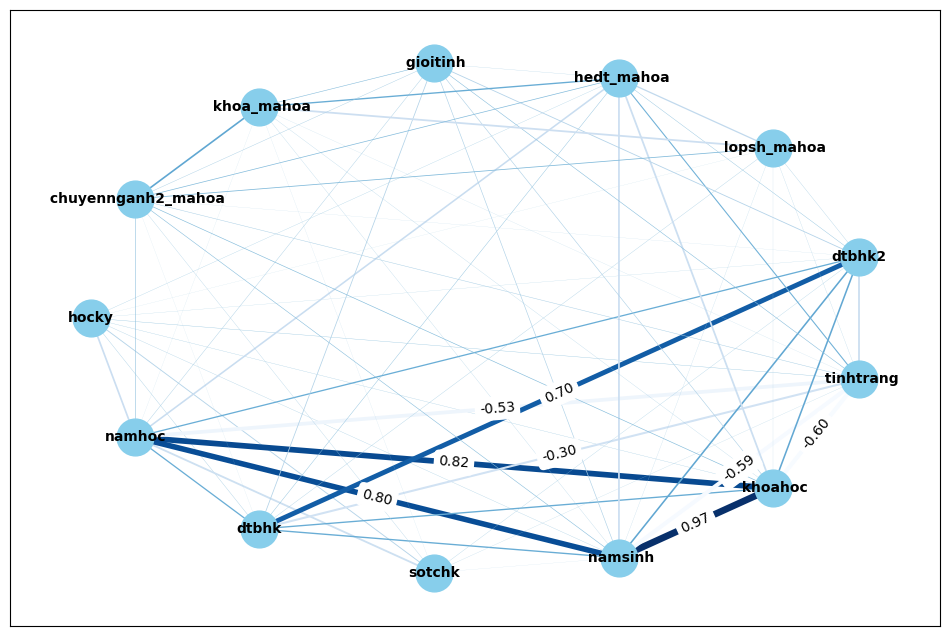

In [39]:

G = nx.Graph()

threshold = corr['dtbhk'].median()
for i in corr.columns:
    for j in corr.columns:
        if i != j and abs(corr.loc[i, j]) > threshold:
            G.add_edge(i, j, weight=corr.loc[i, j])

pos = nx.shell_layout(G)

plt.figure(figsize=(12, 8))
edges = G.edges(data=True)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

edge_colors = [d['weight'] for (_, _, d) in edges]
edge_widths = [abs(d['weight']) * 5 for (_, _, d) in edges]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths, edge_cmap=plt.cm.Blues)

high_weight_edges = {(i, j): f"{w['weight']:.2f}" for i, j, w in edges if abs(w['weight']) > 0.29}
nx.draw_networkx_edge_labels(G, pos, edge_labels=high_weight_edges)

plt.show()

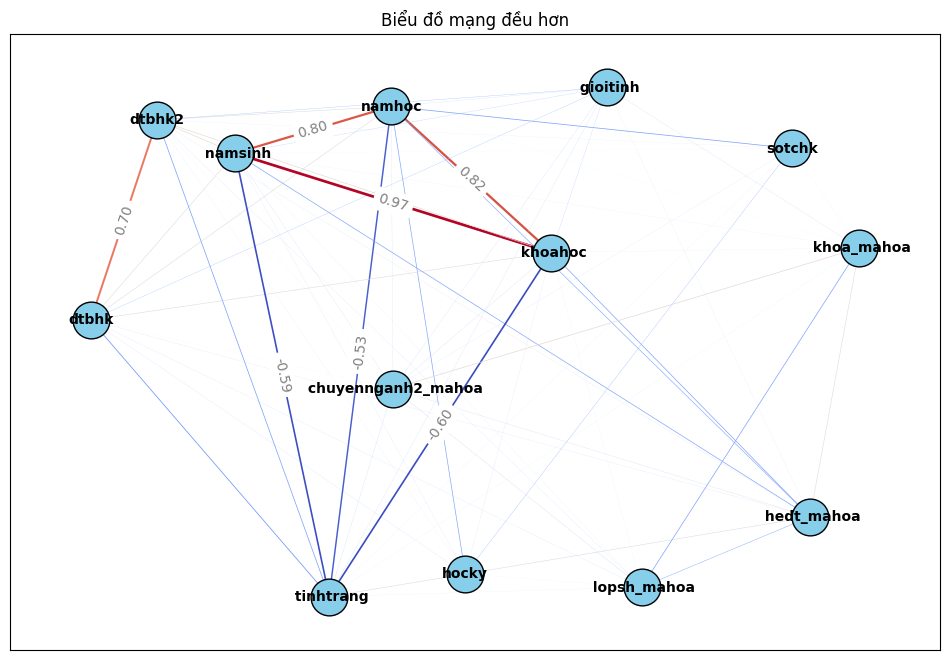

In [40]:
# Tạo đồ thị mạng
G = nx.Graph()

# Đặt ngưỡng cho độ tương quan
threshold = corr['dtbhk'].median()

# Thêm các cạnh vào đồ thị nếu có độ tương quan lớn hơn ngưỡng
for i in corr.columns:
    for j in corr.columns:
        if i != j and abs(corr.loc[i, j]) > threshold:
            G.add_edge(i, j, weight=corr.loc[i, j])

# Tăng giá trị k và thêm seed để có bố cục nhất quán
pos = nx.spring_layout(G, k=0.7, iterations=30, seed=100)  # Thử với k=0.7 và ít iterations hơn

# Vẽ đồ thị mạng
plt.figure(figsize=(12, 8))
edges = G.edges(data=True)

# Vẽ các nút trong mạng
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue", edgecolors="black")
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

# Vẽ các cạnh, điều chỉnh độ rộng và màu sắc dựa vào trọng số
edge_colors = [d['weight'] for (_, _, d) in edges]
edge_widths = [abs(d['weight']) * 2 for (_, _, d) in edges]  # Giảm độ rộng để tránh rối
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths, edge_cmap=plt.cm.coolwarm)

# Vẽ nhãn cho các cạnh quan trọng
high_weight_edges = {(i, j): f"{w['weight']:.2f}" for i, j, w in edges if abs(w['weight']) > 0.4}
nx.draw_networkx_edge_labels(G, pos, edge_labels=high_weight_edges, font_color="gray")

plt.title("Biểu đồ mạng đều hơn")
plt.show()
